# Data Cleaning, Preprocessing, EDA, and Dashboarding Plan

## Overview

This document outlines a step-by-step approach for cleaning, preprocessing, exploring, and visualizing a dataset using Python. The ultimate goal is to create a customizable dashboard for data visualization.

## Step-by-Step Plan

### 1. Dataset Cleaning
- **Load the Dataset**
  - Use pandas to load the dataset into a DataFrame.
- **Remove or Impute Missing Values**
  - Identify NaN values in the dataset.
  - Decide whether to:
    - Drop rows with NaN values.
    - Replace NaN values with 0 or the mean/median of the column.

### 2. Preprocessing
- **Define Functions for Reusability**
  - Create a separate `.py` file (e.g., `data_cleaning_functions.py`) to hold all defined functions.
  - Functions may include:
    - Combine similar columns
    - Drop unnecessary columns

### 3. Data Transformation
- **Create New DataFrame**
  - Transform the cleaned DataFrame 

### 5. Exploratory Data Analysis (EDA)
- **Visualize Data in Python**
  - Create exploratory visualizations using libraries like Matplotlib and Seaborn.
  - Produce summary statistics and visual representations (e.g., histograms, scatter plots).
- **Document EDA Insights**
  - Summarize key findings from the EDA phase.
  - Store visualizations in a Jupyter notebook for reference.

### 6. Dashboard Creation
- **Choose Dashboarding Tool**
  - **Google BigQuery**: Consider using if the dataset is large and requires powerful querying capabilities. It integrates well with Google Data Studio for visualization.
  - **Dash**: Opt for Dash if you want a highly customizable web-based dashboard that you can deploy easily. It allows for interactivity and can be tailored to user input.
- **Implement Dashboard**
  - Using Dash, create a web application for visualizations.
  - Include filters and customizable options to allow users to interact with the the data.


**Import of Libraries**

In [930]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [931]:
import importlib
import re
import data_cleaning_functions
importlib.reload(data_cleaning_functions)
from data_cleaning_functions import combine_columns

**Import Dataset**

In [932]:
# Load and check the dataset
df = pd.read_csv("Coffee Dataset.csv")
df.head()

,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,...,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Education Level,Ethnicity/Race,Employment Status,Number of Children,Political Affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Save Columns Names as Text File**

In [933]:
# Save column names to a text file
with open('column_names.txt', 'w') as f:
    for column in df.columns:
        f.write(column + '\n')

**Understanding the Data**

In [934]:
# Inspect the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 111 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(90)
memory usage: 3.4+ MB


,What kind of flavorings do you add?,What kind of flavorings do you add? (Vanilla Syrup),What kind of flavorings do you add? (Caramel Syrup),What kind of flavorings do you add? (Hazelnut Syrup),What kind of flavorings do you add? (Cinnamon (Ground or Stick)),What kind of flavorings do you add? (Peppermint Syrup),What kind of flavorings do you add? (Other),What other flavoring do you use?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,...,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3938.000000,3798.000000,...,3789.000000,3780.000000,3767.000000,3773.000000,3764.000000,3751.000000,3766.000000,3767.000000,3765.000000,3764.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.693499,2.141127,...,3.310900,3.013228,2.223786,3.068646,3.071998,2.366836,3.064790,2.162729,3.858167,3.375930
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.948867,0.947163,...,1.185953,0.992875,0.865389,1.113546,0.999267,0.921048,1.128431,1.081546,1.007973,1.452504
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**First Thoughts**

Based on the initial inspection, most non-qualitative columns are largely empty, as seen in df.head(), likely due to limited numerical data. Additionally, the dataset has become unnecessarily large and complex due to many columns. To simplify, I plan to merge similar columns where possible to reduce redundancy and improve clarity.

In [935]:
from data_cleaning_functions import combine_columns

# Display initial preview of the dataset
print("Initial dataset preview:")
display(df.head())

# Step 1: Combine columns related to 'Where do you typically drink coffee?'
drink_location_columns = [
    'Where do you typically drink coffee? (At home)',
    'Where do you typically drink coffee? (At the office)',
    'Where do you typically drink coffee? (On the go)',
    'Where do you typically drink coffee? (At a cafe)',
    'Where do you typically drink coffee? (None of these)'
]
df = combine_columns(df, drink_location_columns, 'Combined_Coffee_Drinking_Location')

# Step 2: Combine columns related to 'How do you brew coffee at home?'
brew_method_columns = [
    'How do you brew coffee at home? (Pour over)',
    'How do you brew coffee at home? (French press)',
    'How do you brew coffee at home? (Espresso)',
    'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
    'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
    'How do you brew coffee at home? (Instant coffee)',
    'How do you brew coffee at home? (Bean-to-cup machine)',
    'How do you brew coffee at home? (Cold brew)',
    'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))',
    'How do you brew coffee at home? (Other)'
]
df = combine_columns(df, brew_method_columns, 'Combined_Home_Brewing_Methods')

# Step 3: Combine columns related to 'On the go, where do you typically purchase coffee?'
purchase_location_columns = [
    'On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))',
    'On the go, where do you typically purchase coffee? (Local cafe)',
    'On the go, where do you typically purchase coffee? (Drive-thru)',
    'On the go, where do you typically purchase coffee? (Specialty coffee shop)',
    'On the go, where do you typically purchase coffee? (Deli or supermarket)',
    'On the go, where do you typically purchase coffee? (Other)'
]
df = combine_columns(df, purchase_location_columns, 'Combined_OnTheGo_Purchase_Locations')

# Step 4: Combine columns related to coffee additives
additive_columns = [
    'Do you usually add anything to your coffee? (No - just black)',
    'Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)',
    'Do you usually add anything to your coffee? (Sugar or sweetener)',
    'Do you usually add anything to your coffee? (Flavor syrup)',
    'Do you usually add anything to your coffee? (Other)'
]
df = combine_columns(df, additive_columns, 'Combined_Coffee_Additives')

# Step 5: Combine columns related to types of dairy added
dairy_columns = [
    'What kind of dairy do you add? (Whole milk)',
    'What kind of dairy do you add? (Skim milk)',
    'What kind of dairy do you add? (Half and half)',
    'What kind of dairy do you add? (Coffee creamer)',
    'What kind of dairy do you add? (Flavored coffee creamer)',
    'What kind of dairy do you add? (Oat milk)',
    'What kind of dairy do you add? (Almond milk)',
    'What kind of dairy do you add? (Soy milk)',
    'What kind of dairy do you add? (Other)'
]
df = combine_columns(df, dairy_columns, 'Combined_Dairy_Types')

# Step 6: Combine columns related to sweeteners added
sweetener_columns = [
    'What kind of sugar or sweetener do you add? (Granulated Sugar)',
    'What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))',
    'What kind of sugar or sweetener do you add? (Honey)',
    'What kind of sugar or sweetener do you add? (Maple Syrup)',
    'What kind of sugar or sweetener do you add? (Stevia)',
    'What kind of sugar or sweetener do you add? (Agave Nectar)',
    'What kind of sugar or sweetener do you add? (Brown Sugar)',
    'What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado))'
]
df = combine_columns(df, sweetener_columns, 'Combined_Sweeteners_Added')

# Step 7: Combine columns related to flavorings added
flavoring_columns = [
    'What kind of flavorings do you add? (Vanilla Syrup)',
    'What kind of flavorings do you add? (Caramel Syrup)',
    'What kind of flavorings do you add? (Hazelnut Syrup)',
    'What kind of flavorings do you add? (Cinnamon (Ground or Stick))',
    'What kind of flavorings do you add? (Peppermint Syrup)',
    'What kind of flavorings do you add? (Other)'
]
df = combine_columns(df, flavoring_columns, 'Combined_Flavorings_Added')

# Display the modified DataFrame
print("\nModified dataset after combining columns:")
display(df.head())

Initial dataset preview:


,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,...,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Education Level,Ethnicity/Race,Employment Status,Number of Children,Political Affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Modified dataset after combining columns:


,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,How do you brew coffee at home?,How else do you brew coffee at home?,"On the go, where do you typically purchase coffee?",Where else do you purchase coffee?,What is your favorite coffee drink?,Please specify what your favorite coffee drink is,...,Employment Status,Number of Children,Political Affiliation,Combined_Coffee_Drinking_Location,Combined_Home_Brewing_Methods,Combined_OnTheGo_Purchase_Locations,Combined_Coffee_Additives,Combined_Dairy_Types,Combined_Sweeteners_Added,Combined_Flavorings_Added
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,,,,No - just black,,,
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,,e.g. Keurig/Nespresso,,No - just black; Sugar or sweetener,,,
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,,Bean-to-cup machine,,No - just black,,,
3,4xWgGr,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,,e.g. Mr. Coffee,,No - just black,,,
4,QD27Q8,25-34 years old,NaN,NaN,Pour over,NaN,NaN,NaN,Latte,NaN,...,NaN,NaN,NaN,,Pour over,,No - just black,,,


**Dropping of non-essential columns**

In [936]:
# Import the function from the file
from data_cleaning_functions import remove_high_missing_columns

# Apply it to your DataFrame
df = remove_high_missing_columns(df, threshold=0.9)

Columns dropped: ['Where else do you purchase coffee?', 'Please specify what your favorite coffee drink is', 'What else do you add to your coffee?', 'What kind of flavorings do you add?', 'What other flavoring do you use?', 'Other reason for drinking coffee']


**Save the new dataset**

The new dataset doesn’t need to be perfect; it just needs to allow for more efficient data gathering compared to the unedited version. Once saved, I’ll print a confirmation statement with its file path to ensure it's been stored correctly.

In [937]:
# Save the modified DataFrame if needed
output_path = '/Users/jamespritchard/Desktop/Admiral_Interview/myenv/combined_coffee_dataset.csv'
df.to_csv(output_path, index=False)
print(f"Modified dataset saved to {output_path}")

Modified dataset saved to /Users/jamespritchard/Desktop/Admiral_Interview/myenv/combined_coffee_dataset.csv


**Importing the New Dataset**

Define as df to replace existing dataset variable name.

In [938]:
# Load and check the dataset
df = pd.read_csv("combined_coffee_dataset.csv")
df.head()

,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,How do you brew coffee at home?,How else do you brew coffee at home?,"On the go, where do you typically purchase coffee?",What is your favorite coffee drink?,Do you usually add anything to your coffee?,What kind of dairy do you add?,...,Employment Status,Number of Children,Political Affiliation,Combined_Coffee_Drinking_Location,Combined_Home_Brewing_Methods,Combined_OnTheGo_Purchase_Locations,Combined_Coffee_Additives,Combined_Dairy_Types,Combined_Sweeteners_Added,Combined_Flavorings_Added
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,No - just black,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No - just black,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,Iced coffee,"Sugar or sweetener, No - just black",NaN,...,NaN,NaN,NaN,NaN,e.g. Keurig/Nespresso,NaN,No - just black; Sugar or sweetener,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,Regular drip coffee,No - just black,NaN,...,NaN,NaN,NaN,NaN,Bean-to-cup machine,NaN,No - just black,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,Iced coffee,"No - just black, Cinnamon",NaN,...,NaN,NaN,NaN,NaN,e.g. Mr. Coffee,NaN,No - just black,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,Pour over,NaN,NaN,Latte,No - just black,NaN,...,NaN,NaN,NaN,NaN,Pour over,NaN,No - just black,NaN,NaN,NaN


**Unexpected Issues**

Suprisingly, I have had issues implementing this code into my seperate .py defined functions file.

**Defined Functions for Quality**

This code defines two functions to help me assess data quality in categorical and numerical columns. The check_categorical_consistency function identifies unique values in specified categorical columns, highlighting any unexpected entries for quick validation. Meanwhile, check_numerical_ranges generates summary statistics (min, max, mean, and standard deviation) for numerical columns and flags any negative values, which may indicate anomalies. 

In [939]:
def check_categorical_consistency(df, categorical_columns):
    """
    Checks for unexpected or inconsistent values in categorical columns.
    
    Returns:
    dict: A dictionary with column names as keys and unique values as sets.
    """
    unique_values = {}
    # Iterate over each categorical column to gather unique values
    for col in categorical_columns:
        # Get unique values from the column, ignoring NaNs
        unique_values[col] = set(df[col].dropna().unique())
        # Print the unique values for reference
        print(f"Unique values in '{col}': {unique_values[col]}")
    
    return unique_values

def check_numerical_ranges(df, numerical_columns):
    """
    Checks if numerical columns have appropriate value ranges and identifies potential anomalies.
    
    Returns:
    pd.DataFrame: A summary DataFrame with min, max, mean, and standard deviation for each numerical column.
    """
    # Generate a summary with descriptive statistics for numerical columns
    summary = df[numerical_columns].describe().T
    # Add the standard deviation to the summary DataFrame
    summary['std_dev'] = df[numerical_columns].std()
    # Print the summary DataFrame for reference
    print(summary)
    
    # Check each numerical column for anomalies, such as negative values
    for col in numerical_columns:
        # Print a warning if negative values are found in the column
        if (df[col] < 0).any():
            print(f"Warning: Column '{col}' contains negative values.")
    
    return summary

In [940]:
# Check categorical columns
categorical_columns = ["Combined_Coffee_Drinking_Location", "Combined_Home_Brewing_Methods"]  # Replace with your actual column names
check_categorical_consistency(df, categorical_columns)

# Check numerical columns
numerical_columns = ["How many cups of coffee do you typically drink per day?", 
                    "In total, much money do you typically spend on coffee in a month?"]  # Replace with your actual column names


# Identify non-numeric values in numerical columns
for col in numerical_columns:
    non_numeric = df[col][pd.to_numeric(df[col], errors='coerce').isna()]
    if not non_numeric.empty:
        print(f"Non-numeric values in column '{col}': {non_numeric.unique()}")

# Replace specific non-numeric values with numeric equivalents
df['How many cups of coffee do you typically drink per day?'] = df['How many cups of coffee do you typically drink per day?'].replace({
    'Less than 1': 0.5,
    'More than 4': 5
})

# Convert the column to numeric, coercing errors to NaN
df['How many cups of coffee do you typically drink per day?'] = pd.to_numeric(df['How many cups of coffee do you typically drink per day?'], errors='coerce')

# Drop rows with NaN in this column if needed (optional)
df = df.dropna(subset=['How many cups of coffee do you typically drink per day?'])

# Re-run the numerical range check
numerical_columns = ['How many cups of coffee do you typically drink per day?']  # Add other numerical columns if needed
check_numerical_ranges(df, numerical_columns)

Unique values in 'Combined_Coffee_Drinking_Location': {'At home; At the office; At a cafe', 'At a cafe', 'At home; At a cafe', 'At home; On the go', 'None of these', 'On the go; At a cafe', 'At home; At the office; On the go; At a cafe', 'At home', 'At the office; On the go; At a cafe', 'At home; At the office', 'At the office; On the go', 'On the go', 'At home; At the office; On the go', 'At a cafe; None of these', 'At home; None of these', 'At the office', 'At home; On the go; At a cafe', 'At the office; At a cafe'}
Unique values in 'Combined_Home_Brewing_Methods': {'Pour over; French press; Espresso; e.g. Keurig/Nespresso; Instant coffee', 'Pour over; Espresso; e.g. Mr. Coffee; Instant coffee', 'e.g. Mr. Coffee; e.g. Keurig/Nespresso; Other', 'Pour over; e.g. Mr. Coffee; Cold brew', 'Pour over; Espresso; e.g. Mr. Coffee; e.g. Keurig/Nespresso', 'Pour over; Espresso; Instant coffee; Cold brew', 'Pour over; French press; Espresso; Cold brew; e.g. Cometeer', 'e.g. Keurig/Nespresso; Bea

,count,mean,std,min,25%,50%,75%,max,std_dev
How many cups of coffee do you typically drink per day?,3949.0,1.776399,0.93108,0.5,1.0,2.0,2.0,5.0,0.93108


This output shows my cleaned coffee consumption dataset after reducing columns from 111 to 69 by combining similar ones, which streamlined the structure for easier analysis. Key columns now include demographic information, coffee brewing methods, and consumption habits. I created combined columns like Combined_Coffee_Drinking_Location and Combined_Home_Brewing_Methods to consolidate related data and reduce redundancy.

For numerical columns such as "How many cups of coffee do you typically drink per day?", I generated summary statistics to understand typical values and spot any anomalies. Non-numeric entries, like "Less than 1" and "More than 4," were noted for potential cleaning. Finally, I saved the modified dataset and printed its file path to confirm successful storage.

In [941]:
# Simplify 'Combined_Coffee_Drinking_Location' by grouping common combinations
df['Simplified_Coffee_Drinking_Location'] = df['Combined_Coffee_Drinking_Location'].apply(lambda x: 
    'Home Only' if x == 'At home' else 
    'Office Only' if x == 'At the office' else 
    'Cafe Only' if x == 'At a cafe' else 
    'Mixed Locations' if ';' in str(x) else 
    'Other' if x == 'None of these' else 
    'Unknown'
)

# Preview the changes
print("Unique values in 'Simplified_Coffee_Drinking_Location':")
print(df['Simplified_Coffee_Drinking_Location'].unique())


Unique values in 'Simplified_Coffee_Drinking_Location':
['Cafe Only' 'Mixed Locations' 'Office Only' 'Home Only' 'Unknown' 'Other']



This code above simplifies the Combined_Coffee_Drinking_Location column by grouping common combinations of coffee-drinking locations into more general categories.

In [942]:
# Replace ranges and symbols with approximate numeric values
df['In total, much money do you typically spend on coffee in a month?'] = df['In total, much money do you typically spend on coffee in a month?'].replace({
    '>$100': 110,
    '$80-$100': 90,
    '$60-$80': 70,
    '$40-$60': 50,
    '$20-$40': 30,
    '<$20': 15
})

# Convert to numeric and handle any remaining issues
df['In total, much money do you typically spend on coffee in a month?'] = pd.to_numeric(
    df['In total, much money do you typically spend on coffee in a month?'], errors='coerce'
)

# Optionally drop rows with NaN in this column
df = df.dropna(subset=['In total, much money do you typically spend on coffee in a month?'])

# Display the cleaned column
print("Cleaned 'In total, much money do you typically spend on coffee in a month?':")
print(df['In total, much money do you typically spend on coffee in a month?'].head())

Cleaned 'In total, much money do you typically spend on coffee in a month?':
15    110.0
17     50.0
34     30.0
41     50.0
42     30.0
Name: In total, much money do you typically spend on coffee in a month?, dtype: float64


/var/folders/hy/15ps5j_j0hg1jcltldnprxx80000gn/T/ipykernel_23754/3007870322.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['In total, much money do you typically spend on coffee in a month?'] = df['In total, much money do you typically spend on coffee in a month?'].replace({


In [943]:
# Function to clean column names
def clean_column_name(col_name):
    # Replace spaces and special characters with underscores, remove unsupported characters
    col_name = re.sub(r'\W+', '_', col_name)  # Replace non-alphanumeric characters with underscores
    col_name = re.sub(r'_+', '_', col_name)   # Replace multiple underscores with a single underscore
    return col_name.strip('_')                # Remove leading/trailing underscores

# Apply the cleaning function to all column names
df.columns = [clean_column_name(col) for col in df.columns]

# Save the updated CSV
df.to_csv("cleaned_combined_coffee_dataset_bq.csv", encoding='utf-8', index=False)
print("Column names modified and file saved as 'cleaned_combined_coffee_dataset_bq.csv'.")

Column names modified and file saved as 'cleaned_combined_coffee_dataset_bq.csv'.


# test visualisations

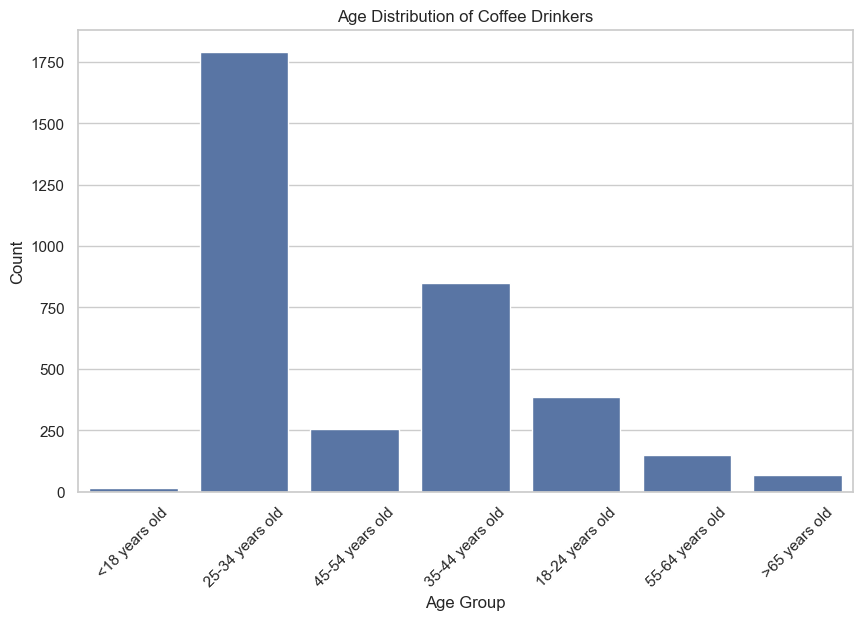

In [944]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='What_is_your_age')
plt.title('Age Distribution of Coffee Drinkers')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

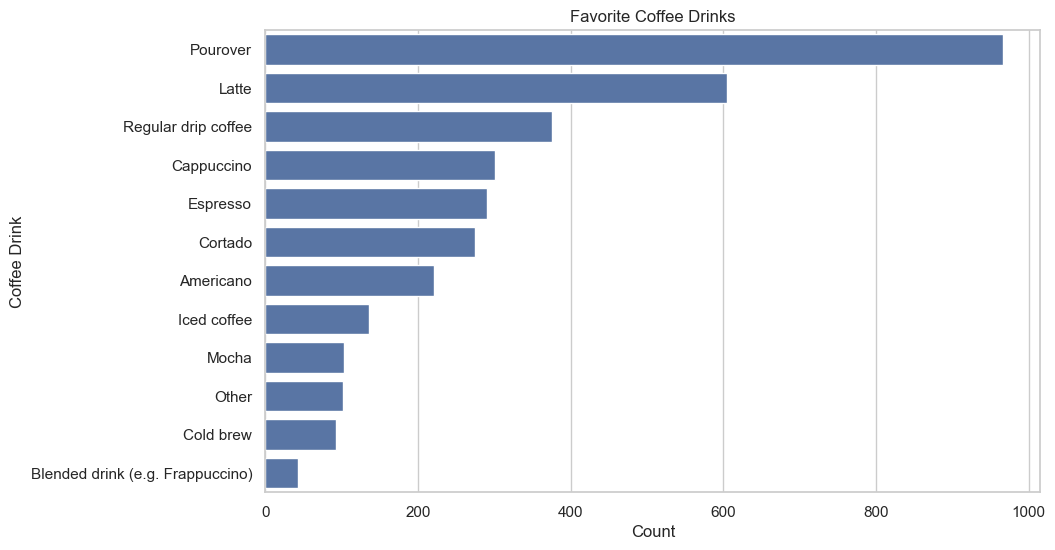

In [945]:
# Favorite Coffee Drinks
plt.figure(figsize=(10, 6))
favorite_drinks = df['What_is_your_favorite_coffee_drink'].value_counts()
sns.barplot(x=favorite_drinks.values, y=favorite_drinks.index)
plt.title('Favorite Coffee Drinks')
plt.xlabel('Count')
plt.ylabel('Coffee Drink')
plt.show()

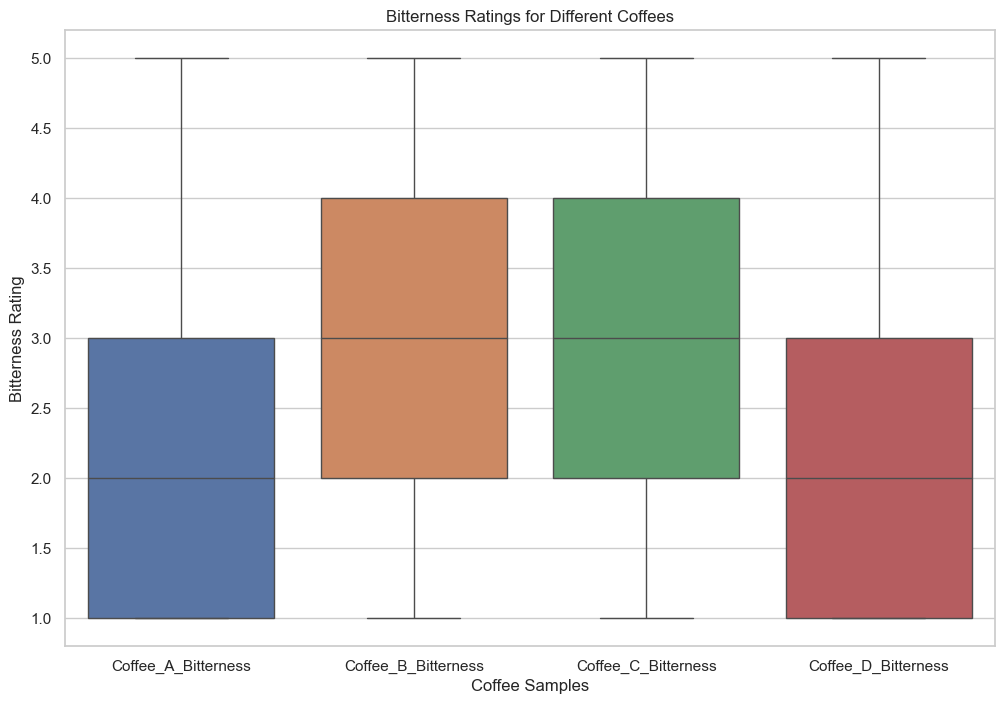

In [946]:
# Boxplot for Coffee Bitterness
plt.figure(figsize=(12, 8))
coffee_samples = ['Coffee_A_Bitterness', 'Coffee_B_Bitterness', 'Coffee_C_Bitterness', 'Coffee_D_Bitterness']
sns.boxplot(data=df[coffee_samples])
plt.title('Bitterness Ratings for Different Coffees')
plt.ylabel('Bitterness Rating')
plt.xlabel('Coffee Samples')
plt.show()

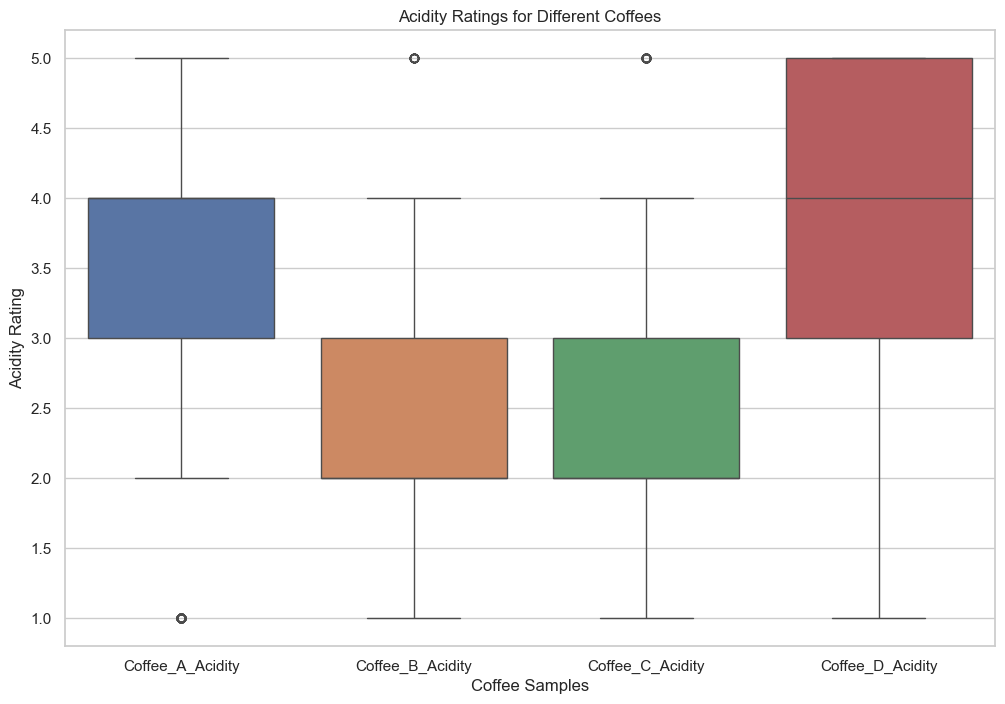

In [947]:
# Boxplot for Acidity Ratings of Different Coffees
plt.figure(figsize=(12, 8))
acidity_samples = ['Coffee_A_Acidity', 'Coffee_B_Acidity', 'Coffee_C_Acidity', 'Coffee_D_Acidity']
sns.boxplot(data=df[acidity_samples])
plt.title('Acidity Ratings for Different Coffees')
plt.ylabel('Acidity Rating')
plt.xlabel('Coffee Samples')
plt.show()

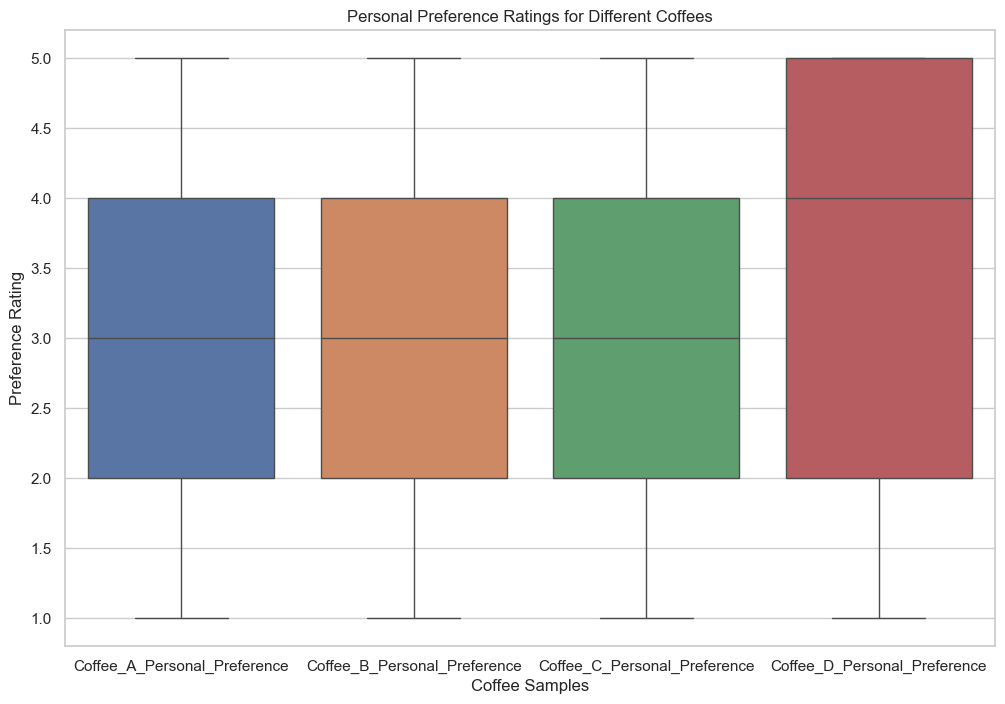

In [948]:
# Boxplot for Personal Preference Ratings of Different Coffees
plt.figure(figsize=(12, 8))
preference_samples = ['Coffee_A_Personal_Preference', 'Coffee_B_Personal_Preference', 'Coffee_C_Personal_Preference', 'Coffee_D_Personal_Preference']
sns.boxplot(data=df[preference_samples])
plt.title('Personal Preference Ratings for Different Coffees')
plt.ylabel('Preference Rating')
plt.xlabel('Coffee Samples')
plt.show()

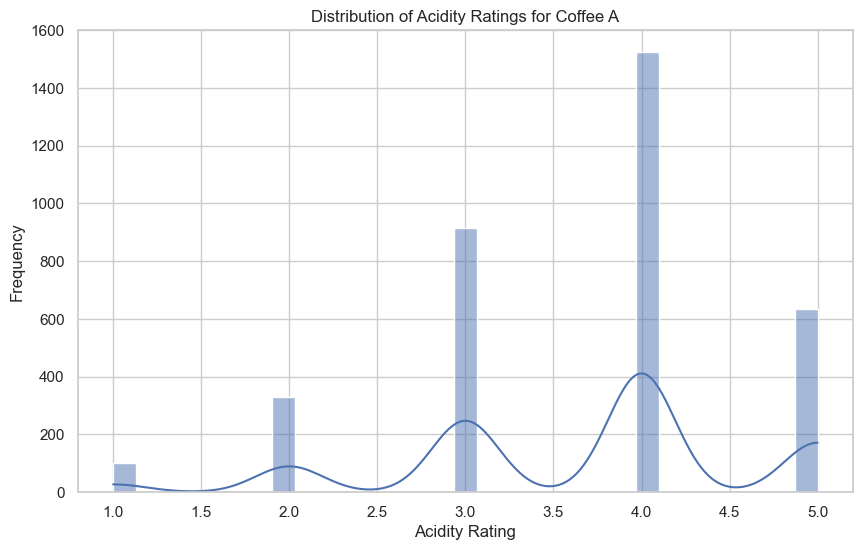

In [949]:
# Histogram for Acidity Ratings of Coffee A
plt.figure(figsize=(10, 6))
sns.histplot(df['Coffee_A_Acidity'].dropna(), kde=True)
plt.title('Distribution of Acidity Ratings for Coffee A')
plt.xlabel('Acidity Rating')
plt.ylabel('Frequency')
plt.show()

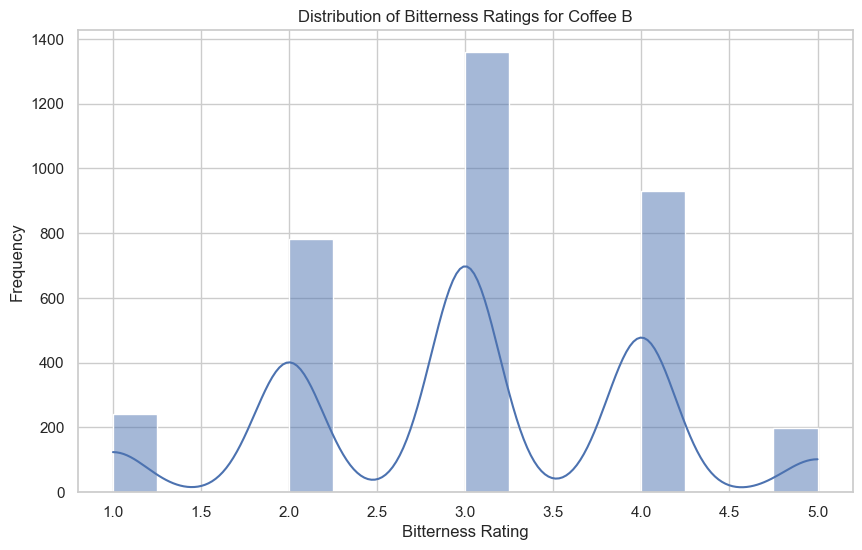

In [950]:
# Histogram for Bitterness Ratings of Coffee B
plt.figure(figsize=(10, 6))
sns.histplot(df['Coffee_B_Bitterness'].dropna(), kde=True)
plt.title('Distribution of Bitterness Ratings for Coffee B')
plt.xlabel('Bitterness Rating')
plt.ylabel('Frequency')
plt.show()

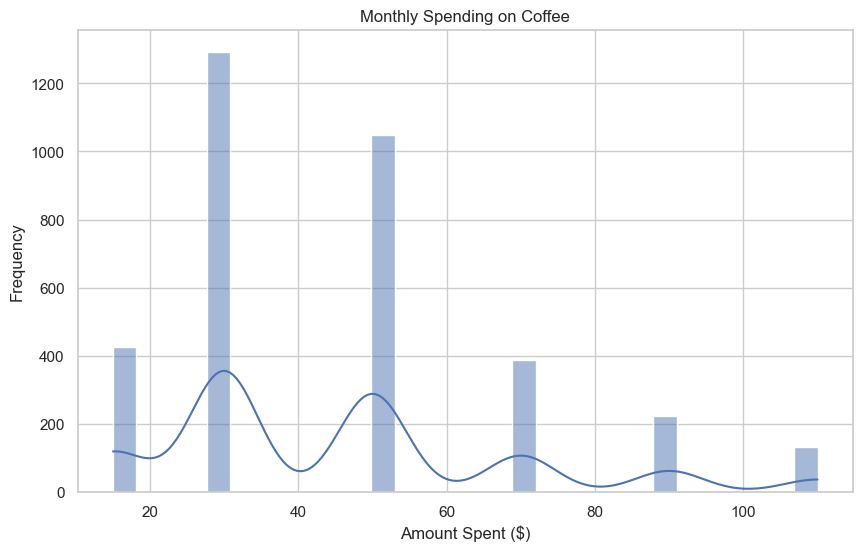

In [951]:
# Monthly Spending on Coffee
plt.figure(figsize=(10, 6))
sns.histplot(df['In_total_much_money_do_you_typically_spend_on_coffee_in_a_month'], bins=30, kde=True)
plt.title('Monthly Spending on Coffee')
plt.xlabel('Amount Spent ($)')
plt.ylabel('Frequency')
plt.show()

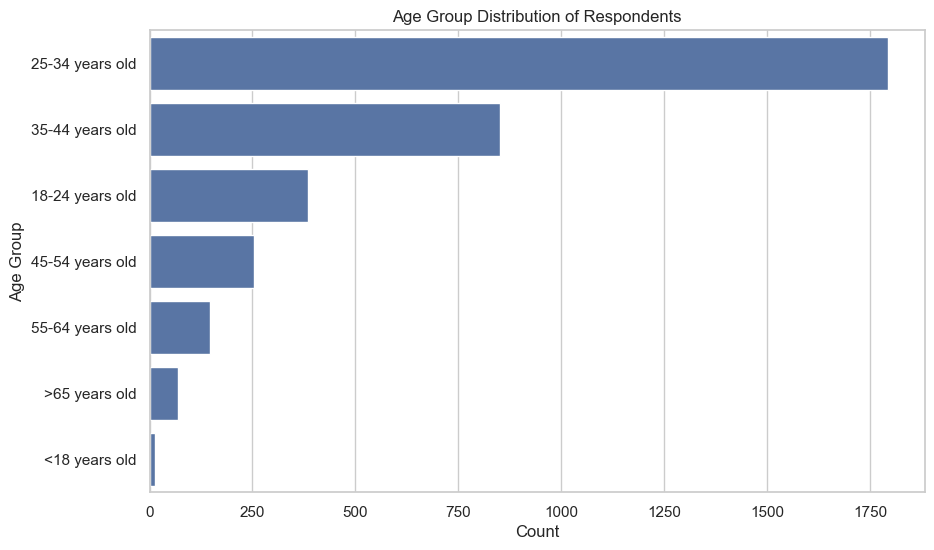

In [952]:
# Set style for plots
sns.set_theme(style="whitegrid")

# Age Group Distribution of Respondents
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='What_is_your_age', order=df['What_is_your_age'].value_counts().index)
plt.title('Age Group Distribution of Respondents')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

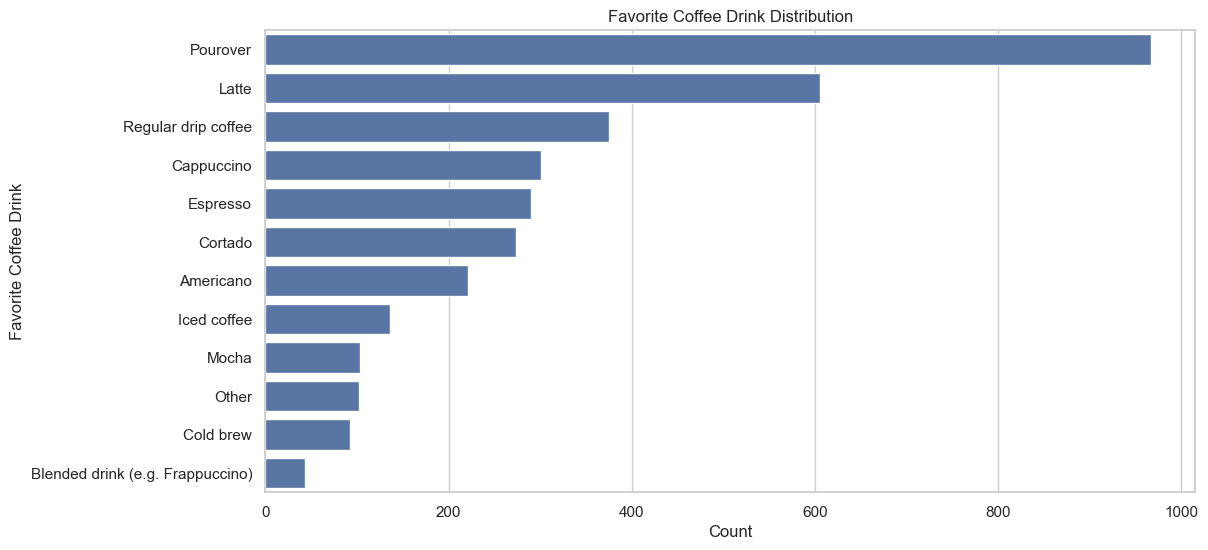

In [953]:
# Favorite Coffee Drink Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='What_is_your_favorite_coffee_drink', 
            order=df['What_is_your_favorite_coffee_drink'].value_counts().index)
plt.title('Favorite Coffee Drink Distribution')
plt.xlabel('Count')
plt.ylabel('Favorite Coffee Drink')
plt.show()

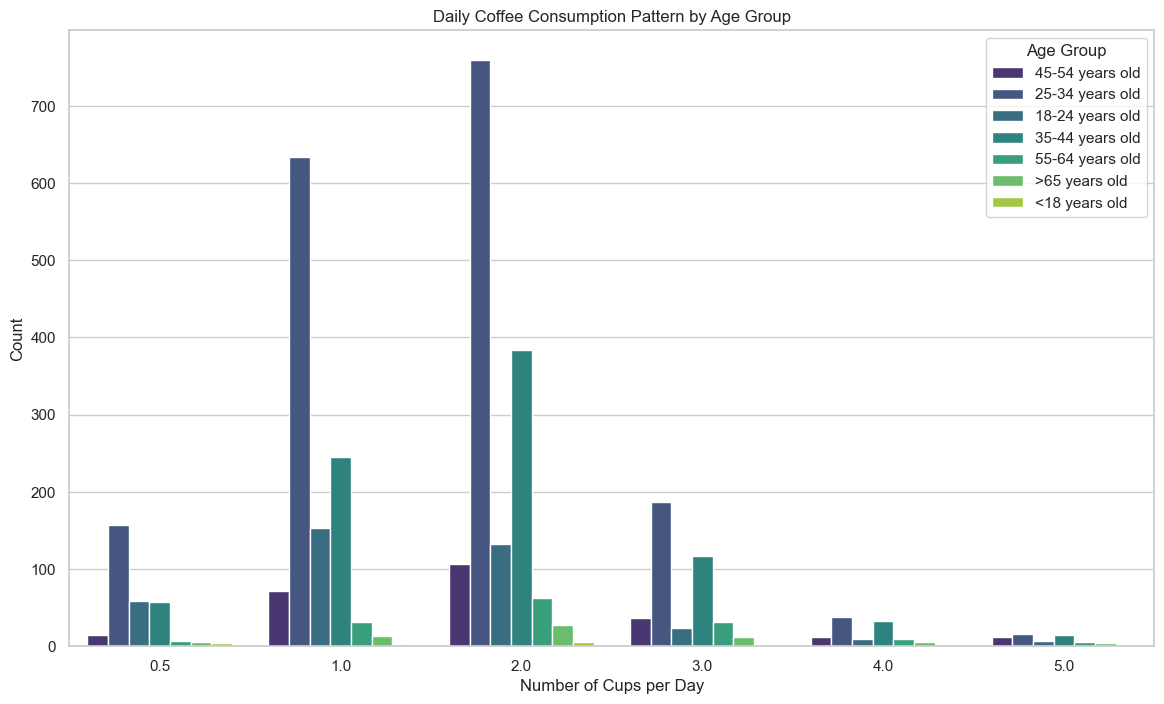

In [954]:

# Daily Coffee Consumption Pattern by Age Group
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='How_many_cups_of_coffee_do_you_typically_drink_per_day', 
            hue='What_is_your_age', palette="viridis")
plt.title('Daily Coffee Consumption Pattern by Age Group')
plt.xlabel('Number of Cups per Day')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

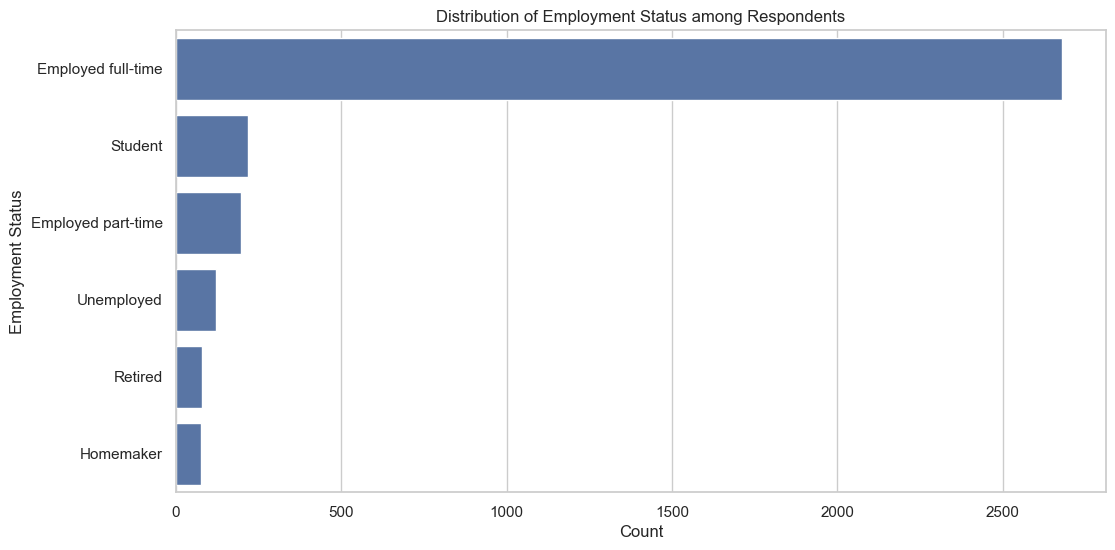

In [955]:
# Distribution of Employment Status among Respondents
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Employment_Status', 
            order=df['Employment_Status'].value_counts().index)
plt.title('Distribution of Employment Status among Respondents')
plt.xlabel('Count')
plt.ylabel('Employment Status')
plt.show()

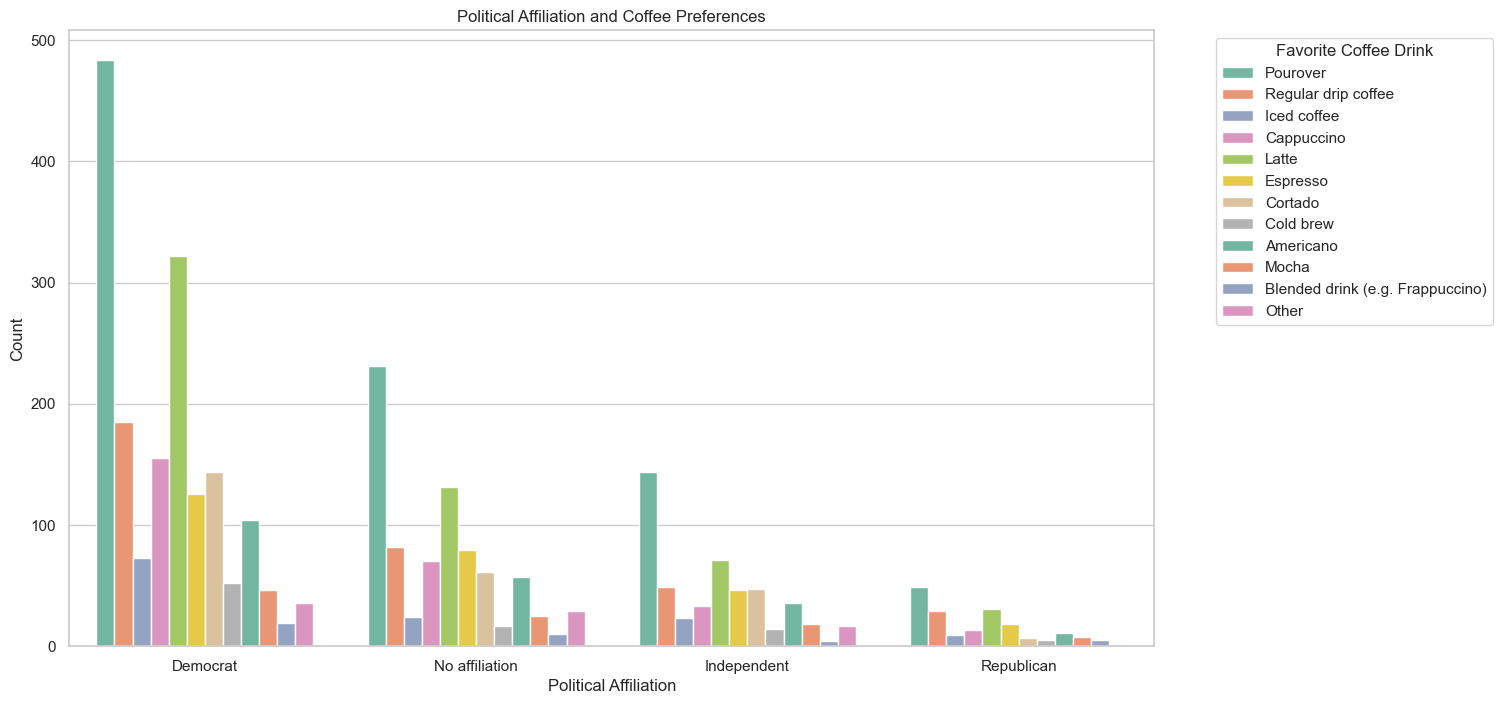

In [956]:
# Political Affiliation and Coffee Preferences
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Political_Affiliation', 
            hue='What_is_your_favorite_coffee_drink', palette="Set2")
plt.title('Political Affiliation and Coffee Preferences')
plt.xlabel('Political Affiliation')
plt.ylabel('Count')
plt.legend(title='Favorite Coffee Drink', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()